In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import string
from nltk.util import ngrams
from collections import Counter
from matplotlib import font_manager as fm, rcParams
import joblib
from classifier import *

/home/davinchi/Documents/Projects/instatrooper/venv/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Lectura de datos

In [2]:
b = open('../../../data/cien.txt','r', encoding="utf8")
text = b.read()

## Preprocesamiento para organizar texto

In [3]:
text = text.split('www.lectulandia.com - Página 12\n')[1].split('www.lectulandia.com - Página 289')[0]

In [4]:
text = re.sub('(\s?www.lectulandia.com - Página \d*)','',text)
text = re.sub('\n',' ',text)

In [5]:
text = re.split('\x0c[A-Z]\s',text)
texto = [re.sub("\s\s+" , " ", capi) for capi in text]

## Datos para trabajar

In [6]:
capitulos = texto[1:]
text = ''.join(capitulos)

In [7]:
text = text.replace("cola de cerdo", "cola_de_cerdo")

In [8]:
palabrasparar = ['entonces',
                'tan',
                'sino',
                'mientras',
                'dijo',
                'mismo',
                'después',
                'dos',
                'dio']

In [9]:
stop_words1 = stopwords.words('spanish')
stop_words1.extend(palabrasparar)
stop_words = set(stop_words1)
tokenizer=RegexpTokenizer("['\w]+")

# Funciones

### Texto

In [10]:
def palabras_texto(input_text):
    # Quitarle los signos de puntuacion
    text = "".join([word for word in input_text if word not in string.punctuation])
    # 
    tokens = tokenizer.tokenize(text)
    # Selecciona de las palabras las que no estan en las stop words
    words = [word for word in tokens if word.lower() not in stop_words]
    # Lo vuelve dict
    vocabulary = set(words)
    #print('The vocabulary size is: ',len(vocabulary))
    #print('The number of words that have been removed is {} which is {:.2f}% of total words'.format(len(tokens)-len(words),len(words)/len(tokens)*100))
    unigrams = list(ngrams(words, 1))
    freq = Counter(unigrams)
    topN= freq.most_common(400)
    wordscount = {w[0]:f for w, f in topN} 
    return wordscount, vocabulary

### Nube de palabras

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
import numpy as np
from PIL import Image

In [12]:
def white_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "rgb(66, 70, 48)" 

In [13]:
def hacer_nube(words_list, filename):
    glasses_mask = np.array(Image.open("../../../data/mariposa1.PNG"))
    wordcloud = WordCloud(font_path = '../../../styles/Florsn01.ttf', background_color="rgba(66, 70, 48, 0)", mode="RGBA",mask=glasses_mask, width=1000, height=1500,)
    wordcloud.fit_words(wordscount)
    wordcloud.recolor(color_func=white_color_func, random_state=3)
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.savefig(filename,bbox_inches='tight', transparent="True", pad_inches = 0)
    plt.show()

### Gráfico de violin

In [14]:
def hacer_violin(names, tokens, filename):
    fig, axs = plt.subplots(len(names), sharex=True, figsize=(15,10))
    prop = fm.FontProperties(fname='../../../styles/Florsn01.ttf', size=35)
    for i, n in enumerate(names):
        indices = [i for i, x in enumerate(tokens) if x == n]
        df = pd.DataFrame(indices,columns=[n])
        #display(df)
        sns.violinplot(x=n, data=df, bw=0.05, ax=axs[i], color='#fdb550', inner=None)

    for ax in axs:
        ax.set_xlim([-7000, len(tokens)+7000])
        lab = ax.get_xlabel()
        ax.set_xlabel("", fontsize=20)
        ax.set_ylabel(lab, fontsize=20, rotation=0, horizontalalignment='right', verticalalignment="center", color='#fdb550', fontproperties=prop)
        ax.grid(False)
        ax.yaxis.grid(True)
        ax.set(frame_on=False)  # New

        # Hide major tick labels
        ax.xaxis.set_major_formatter(ticker.NullFormatter())
        
        ax.tick_params(axis='both', which='both', length=0)
        
        # Customize minor tick labels
        #ax.xaxis.set_minor_locator(ticker.FixedLocator(np.arange(0.5,19,0.5)))
        #ax.xaxis.set_minor_formatter(ticker.FixedFormatter(apariciones.index))
        
        

    plt.savefig(filename,bbox_inches='tight', transparent="True", pad_inches = 0)
    plt.show()


# Inicio

## Texto entero

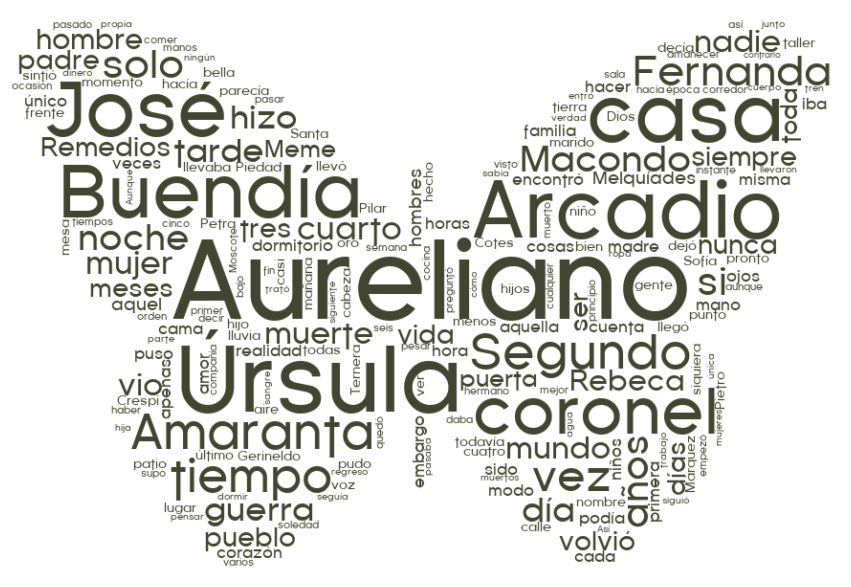

In [15]:
wordscount, vocabulary = palabras_texto(text)
hacer_nube(wordscount, '100_mariposa.png')

## Gráfico de violin

In [27]:
# palabras = "".join([word for word in text])
# tokens = tokenizer.tokenize(palabras)

In [33]:
tokens = text.split()

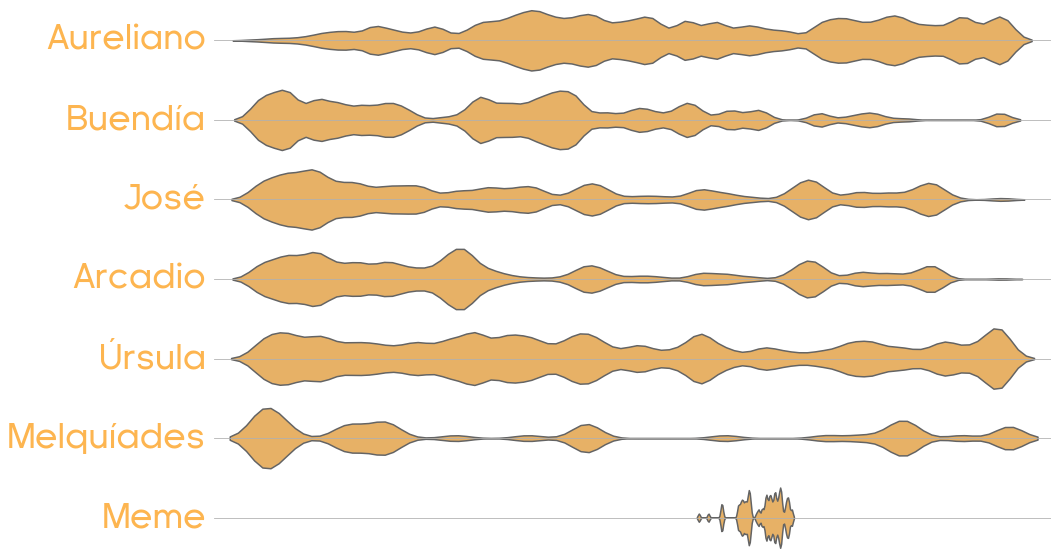

In [35]:
nombres_personajes = ['Aureliano', 'Buendía', 'José', 'Arcadio', 'Úrsula', 'Melquíades', "Meme"]
hacer_violin(nombres_personajes, tokens, "personajes.png")

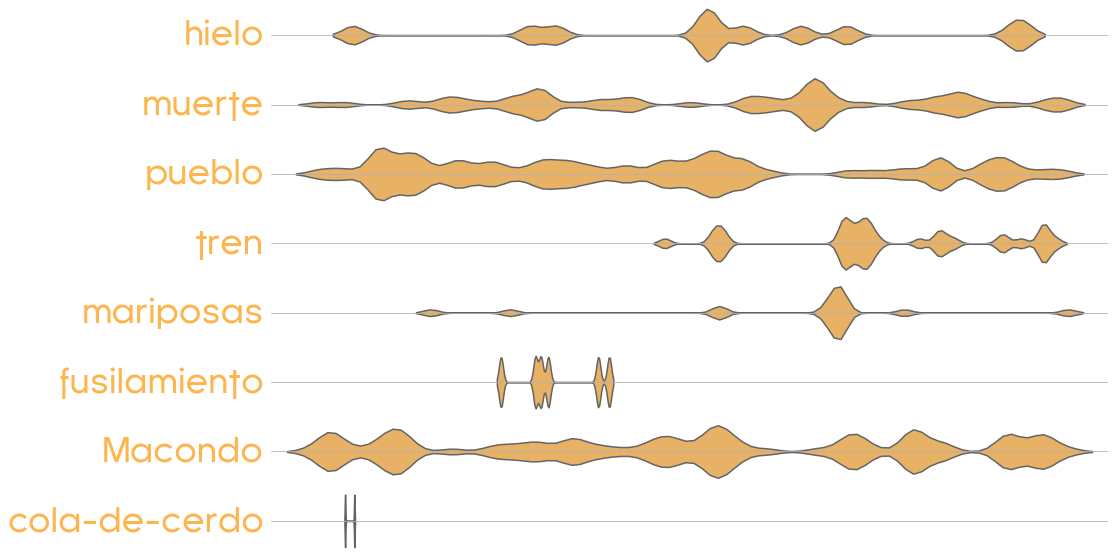

In [36]:
nombres_objetos = ['hielo', 'muerte', 'pueblo','tren','mariposas','fusilamiento', 'Macondo', 'cola-de-cerdo']
hacer_violin(nombres_objetos, tokens, "objetos.png")

In [19]:
# clf = SentimentClassifier()

In [20]:
# sentimientos = [clf.predict(c) for c in capitulos]

In [21]:
# df_sents = pd.DataFrame(sentimientos,columns=["sentimiento"]).reset_index().rename(columns={"index":"capitulo"})
# df_sents["capitulo"] = df_sents["capitulo"] + 1
# df_sents

In [22]:
# sns.barplot(x="capitulo", y="sentimiento", data=df_sents)

In [23]:
# capitulos[12]

In [24]:
capitulos[12]

' n el aturdimiento de los últimos años, Úrsula había dispuesto de muy escasas treguas para atender a la formación papal de José Arcadio, cuando este tuvo que ser preparado a las volandas para irse al seminario. Meme, su hermana, repartida entre la rigidez de Fernanda y las amarguras de Amaranta, llegó casi al mismo tiempo a la edad prevista para mandarla al colegio de las monjas donde harían de ella una virtuosa del clavicordio. Úrsula se sentía atormentada por graves dudas acerca de la eficacia de los métodos con que había templado el espíritu del lánguido aprendiz de Sumo Pontífice, pero no le echaba la culpa a su trastabillante vejez ni a los nubarrones que apenas le permitían vislumbrar el contorno de las cosas, sino a algo que ella misma no lograba definir pero que concebía confusamente como un progresivo desgaste del tiempo. «Los años de ahora ya no vienen como los de antes», solía decir, sintiendo que la realidad cotidiana se le escapaba de las manos. Antes, pensaba, los niños 